### Nearest Neighborhood Algorithm Exercise

Think about the Traveling Salesperson Problem (TSP) again. This time, implement the Nearest Neighbor "heuristic" algorithm to get a solution to TSP. The procedure is like this in short:

Start from a city and mark it as the current city, Find the unvisited nearest city to the current city and update the current city with this neighbor Repeat Step 2 until each city is visited. Use the Nearest Neighbor heuristic for each city (try starting the tour with each city). Give the shortest tour and distance as an output. Compare the result to the optimal solution.

fuente: https://jupyter.brynmawr.edu/services/public/dblank/jupyter.cs/FLAIRS-2015/TSPv3.ipynb

fuente: https://stackoverflow.com/questions/17493494/nearest-neighbour-algorithm

fuente:https://www.programiz.com/python-programming/methods/built-in/min

In [1]:
import cplex
import pandas as pd
import itertools

In [2]:
df = pd.read_excel("TSP_input.xlsx", index_col=0)
df

,1,2,3,4,5,6,7,8,9,10,11,12,13
City/City,,,,,,,,,,,,,
1,0,2451,713,1018,1631,1374,2408,213,2571,875,1420,2145,1972
2,2451,0,1745,1524,831,1240,959,2596,403,1589,1374,357,579
3,713,1745,0,355,920,803,1737,851,1858,262,940,1453,1260
4,1018,1524,355,0,700,862,1395,1123,1584,466,1056,1280,987
5,1631,831,920,700,0,663,1021,1769,949,796,879,586,371
6,1374,1240,803,862,663,0,1681,1551,1765,547,225,887,999
7,2408,959,1737,1395,1021,1681,0,2493,678,1724,1891,1114,701
8,213,2596,851,1123,1769,1551,2493,0,2699,1038,1605,2300,2099
9,2571,403,1858,1584,949,1765,678,2699,0,1744,1645,653,600


In [3]:
N = len(df)
distance = {i:{j: int(df.iloc[i,j]) for j in range(N)} for i in range(N)}


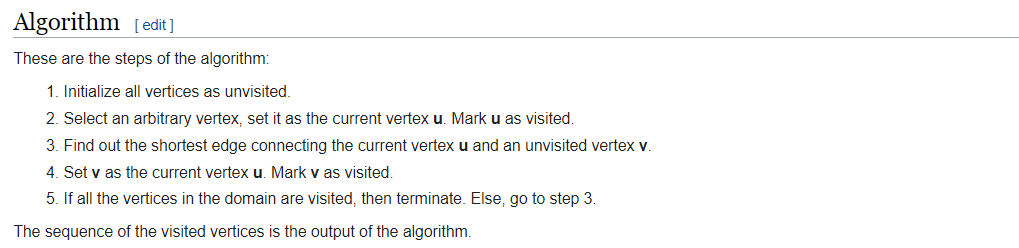

In [4]:
def nn_tsp(graph,start):
    N = len(df)
    vertex_index=[i for i in range(N)]
    distance = {i:{j: int(graph.iloc[i,j]) for j in range(N)} for i in range(N)}
    cost = 0
    tour = [start]
    vertex_index.remove(start)
    unvisited = vertex_index
    
    while unvisited:
        C = nearest_neighbor( tour[-1], unvisited)
        cost += distance[tour[-1]][C]
        tour.append(C)
        unvisited.remove(C)
   

    cost = cost + distance[tour[-1]][start]
    tour.append(start)
        
    return tour, cost

def nearest_neighbor(A , unvisited):
    cities = {i : distance[A][i] for i in unvisited}          
    return min(cities, key = lambda k: cities[k])
         

In [5]:
a = nn_tsp (df , 1)
a

([1, 11, 12, 4, 5, 10, 9, 2, 3, 0, 7, 6, 8, 1], 8221)

Repeat the function with a differente sources and select the min tour 

In [6]:
tours={}
for i in range(len(df)):
    nn_results = []
    nn_results = nn_tsp(df , i)
    tours.update({nn_results[1]: nn_results[0]})
     
shortest_tour = min(tours)
print(f"Shortest tour is:" )
print(tours[shortest_tour] )
print(f"With distance: " )
print(shortest_tour)

Shortest tour is:
[2, 9, 3, 4, 12, 11, 1, 8, 6, 5, 10, 0, 7, 2]
With distance: 
8131
